In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import scipy as sp
import datetime as dt


from ei_net import *
from ce_net import *

from collections import Counter


import ei_net
import ce_net

import importlib
importlib.reload(ei_net)
importlib.reload(ce_net)

%matplotlib inline

# The emergence of informative higher scales in complex networks

# Chapter 09 - Spectral Causal Emergence
_______________

## 9.1 Example of spectral coarse graining

In [12]:
N = 500
m = 1
G = check_network(nx.barabasi_albert_graph(N,m))
micro_ei = effective_information(G)
# print micro_ei
print('Micro EI: ', micro_ei)

Micro EI:  7.060315204702237


In [13]:
import ce_net

import importlib
importlib.reload(ce_net)

from ce_net import *

CE = causal_emergence_spectral(G)

EI_micro =  7.060315204702237
epsilon_ei =  [7.386024999704422, 7.253392737125242, 0.0]
epsilon_ei =  [7.386024999704422, 7.381036063747137, 7.253392737125242]
epsilon_ei =  [7.386024999704422, 7.384735301591935, 7.381036063747137]
epsilon_ei =  [7.386024999704422, 7.385862548577813, 7.384735301591935]
epsilon_ei =  [7.386024999704422, 7.385862548577813, 7.385862548577813]
EI_macro =  7.386024999704422


In [5]:
CE['EI_macro'], CE['EI_micro']

(7.349470534462427, 6.900740888441178)

In [6]:
def preferential_attachment_network(N, alpha=1.0, m=1):
    """
    Generates a network based off of a preferential attachment 
    growth rule. Under this growth rule, new nodes place their 
    $m$ edges to nodes already present in the graph, G, with 
    a probability proportional to $k^\alpha$.
    
    Params
    ------
    N (int): the desired number of nodes in the final network
    alpha (float): the exponent of preferential attachment. 
                   When alpha is less than 1.0, we describe it
                   as sublinear preferential attachment. At
                   alpha > 1.0, it is superlinear preferential
                   attachment. And at alpha=1.0, the network 
                   was grown under linear preferential attachment,
                   as in the case of Barabasi-Albert networks.
    m (int): the number of new links that each new node joins
             the network with.
             
    Returns
    -------
    G (nx.Graph): a graph grown under preferential attachment.
    
    """
    G = nx.Graph()
    G = nx.complete_graph(m+1)

    for node_i in range(m+1,N):
        degrees = np.array(list(dict(G.degree()).values()))
        probs = (degrees**alpha) / sum(degrees**alpha)
        eijs = np.random.choice(
                    G.number_of_nodes(), size=(m,), 
                    replace=False, p=probs)
        for node_j in eijs:
            G.add_edge(node_i, node_j)

    return G

In [7]:
N = 100
m = 1
n_iter = 100
alphas = np.random.uniform(-1, 3, n_iter)
out_alphas = {}
for ai, alpha in enumerate(alphas):
    if ai % 50 == 0:
        print("Done with %03i iterations at:"%ai,dt.datetime.now())
    G = preferential_attachment_network(N, alpha, m)
    CE = causal_emergence_spectral(G)
    ei_gain  = CE['EI_macro'] - CE['EI_micro']
    eff_gain = ei_gain / np.log2(N)
    out_alphas[alpha] = {'ei_gain':ei_gain, 'eff_gain':eff_gain}

Done with 000 iterations at: 2024-06-28 11:56:09.286767
EI_micro =  5.531199590147895


epsilon_ei =  [5.534940849354363, 4.933503760221157, 0.9999999999999858]
epsilon_ei =  [5.534940849354363, 5.526417313234308, 4.933503760221157]
epsilon_ei =  [5.534940849354363, 5.534940849354363, 5.526417313234308]
epsilon_ei =  [5.534940849354363, 5.534940849354363, 5.534940849354363]
epsilon_ei =  [5.534940849354363, 5.534940849354363, 5.534940849354363]
EI_macro =  5.534940849354363
EI_micro =  4.945334788957864
epsilon_ei =  [5.161810466656341, 4.986834894198511, 0.0]
epsilon_ei =  [5.161810466656341, 5.161810466656341, 4.986834894198511]
epsilon_ei =  [5.161810466656341, 5.161810466656341, 5.151887288701873]
epsilon_ei =  [5.161810466656341, 5.161810466656341, 5.151887288701875]
epsilon_ei =  [5.161810466656341, 5.161810466656341, 5.151887288701873]
EI_macro =  5.161810466656341
EI_micro =  5.472777599354517
epsilon_ei =  [5.472777599354517, 5.2144382733584616, 0.0]
epsilon_ei =  [5.472777599354517, 5.472777599354517, 5.2144382733584616]
epsilon_ei =  [5.472777599354517, 5.47277

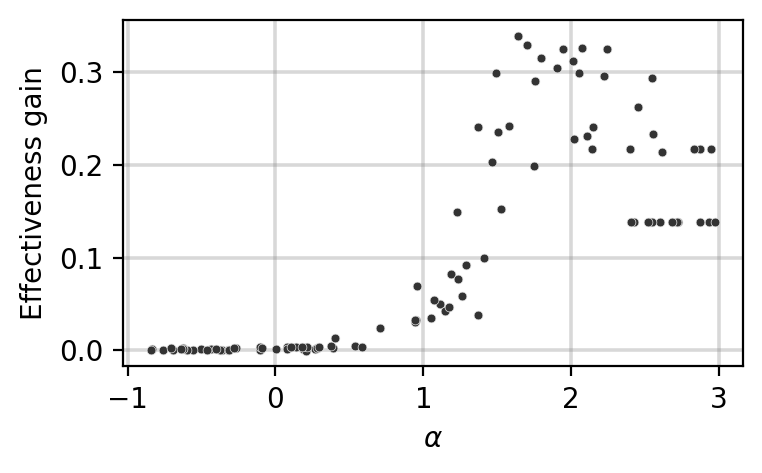

In [8]:
plt.rc('axes', axisbelow=True)

ei_gains = [i['ei_gain'] for i in out_alphas.values()]
eff_gains = [i['eff_gain'] for i in out_alphas.values()]

fig, ax = plt.subplots(1, 1, figsize=(4,2.25), dpi=200)

ax.scatter(alphas, eff_gains, marker='o', s=10, c='.2', lw=0.25, edgecolors='.9')

ax.set_ylabel('Effectiveness gain')
ax.set_xlabel(r'$\alpha$')
ax.grid(linestyle='-', linewidth=1.3, color='.5', alpha=0.3)

plt.show()

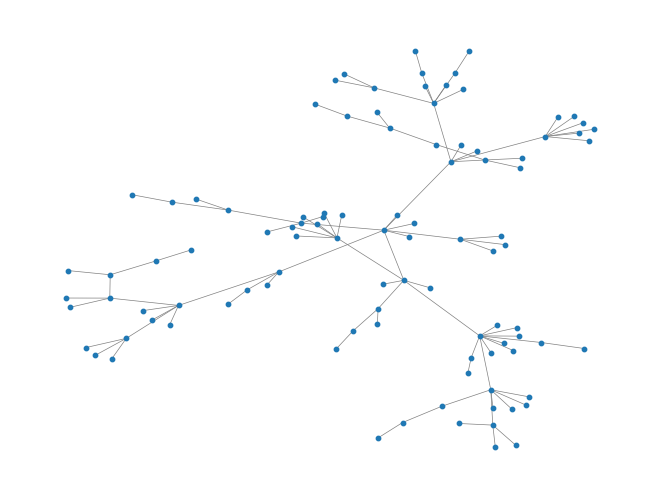

EI_micro =  4.986981914043909
epsilon_ei =  [5.08586720775899, 4.959002029290453, 0.0]
epsilon_ei =  [5.08586720775899, 5.08586720775899, 4.959002029290453]
epsilon_ei =  [5.08586720775899, 5.08586720775899, 5.056472055736742]
epsilon_ei =  [5.08586720775899, 5.08586720775899, 5.08586720775899]
epsilon_ei =  [5.08586720775899, 5.08586720775899, 5.08586720775899]
EI_macro =  5.08586720775899
EI gain:  0.09888529371508081
Eff gain:  0.014883719769141143


In [16]:
N = 100
m = 1
alpha = 1.0
G = preferential_attachment_network(N, alpha, m)
# plot graph G
nx.draw(G, node_size=10, edge_color='gray', width=0.5)
plt.show()

CE = causal_emergence_spectral(G)
ei_gain  = CE['EI_macro'] - CE['EI_micro']
eff_gain = ei_gain / np.log2(N)

print('EI gain: ', ei_gain)
print('Eff gain: ', eff_gain)


In [16]:
N = 100
m = 1
n_iter = 1000
alphas = np.random.uniform(-1, 3, n_iter)
out_alphas = {}
for ai, alpha in enumerate(alphas):
    if ai % 50 == 0:
        print("Done with %03i iterations at:"%ai,dt.datetime.now())
    G = preferential_attachment_network(N, alpha, m)
    CE = causal_emergence_spectral(G)
    ei_gain  = CE['EI_macro'] - CE['EI_micro']
    eff_gain = ei_gain / np.log2(N)
    out_alphas[alpha] = {'ei_gain':ei_gain, 'eff_gain':eff_gain}

Done with 000 iterations at: 2024-06-18 22:35:06.330635
Done with 050 iterations at: 2024-06-18 22:35:17.699922
Done with 100 iterations at: 2024-06-18 22:35:28.925499
Done with 150 iterations at: 2024-06-18 22:35:40.164356
Done with 200 iterations at: 2024-06-18 22:35:51.583184
Done with 250 iterations at: 2024-06-18 22:36:02.816449
Done with 300 iterations at: 2024-06-18 22:36:14.257381
Done with 350 iterations at: 2024-06-18 22:36:25.151131
Done with 400 iterations at: 2024-06-18 22:36:37.632119
Done with 450 iterations at: 2024-06-18 22:36:49.516668
Done with 500 iterations at: 2024-06-18 22:37:00.942304
Done with 550 iterations at: 2024-06-18 22:37:11.996296
Done with 600 iterations at: 2024-06-18 22:37:23.342217
Done with 650 iterations at: 2024-06-18 22:37:34.759083
Done with 700 iterations at: 2024-06-18 22:37:46.546920
Done with 750 iterations at: 2024-06-18 22:37:57.228256
Done with 800 iterations at: 2024-06-18 22:38:08.805609
Done with 850 iterations at: 2024-06-18 22:38:20

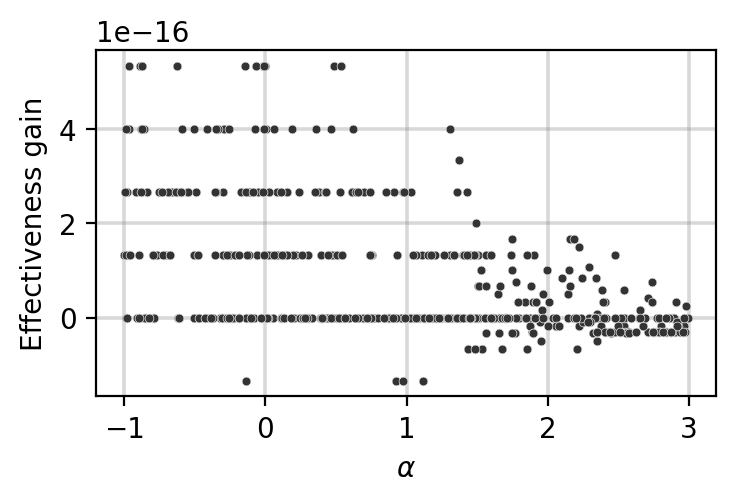

In [28]:
plt.rc('axes', axisbelow=True)

ei_gains = [i['ei_gain'] for i in out_alphas.values()]
eff_gains = [i['eff_gain'] for i in out_alphas.values()]

fig, ax = plt.subplots(1, 1, figsize=(4,2.25), dpi=200)

ax.scatter(alphas, eff_gains, marker='o', s=10, c='.2', lw=0.25, edgecolors='.9')

ax.set_ylabel('Effectiveness gain')
ax.set_xlabel(r'$\alpha$')
ax.grid(linestyle='-', linewidth=1.3, color='.5', alpha=0.3)

plt.show()

In [25]:
import ce_net

import importlib
importlib.reload(ce_net)

from ce_net import *

N = 100
m = 1
n_iter = 500
alphas = np.random.uniform(-1, 3, n_iter)
out_alphas = {}
for ai, alpha in enumerate(alphas):
    if ai % 50 == 0:
        print("Done with %03i iterations at:"%ai,dt.datetime.now())
    G = preferential_attachment_network(N, alpha, m)
    CE = causal_emergence_louvain(G)
    ei_gain  = CE['EI_macro'] - CE['EI_micro']
    eff_gain = ei_gain / np.log2(N)
    out_alphas[alpha] = {'ei_gain':ei_gain, 'eff_gain':eff_gain}

Done with 000 iterations at: 2024-06-21 15:33:17.171525
Done with 050 iterations at: 2024-06-21 15:34:00.955496
Done with 100 iterations at: 2024-06-21 15:34:45.318166
Done with 150 iterations at: 2024-06-21 15:35:33.506140
Done with 200 iterations at: 2024-06-21 15:36:20.143707
Done with 250 iterations at: 2024-06-21 15:37:06.951944
Done with 300 iterations at: 2024-06-21 15:37:51.515073
Done with 350 iterations at: 2024-06-21 15:38:34.987113
Done with 400 iterations at: 2024-06-21 15:39:19.964500
Done with 450 iterations at: 2024-06-21 15:40:08.250334


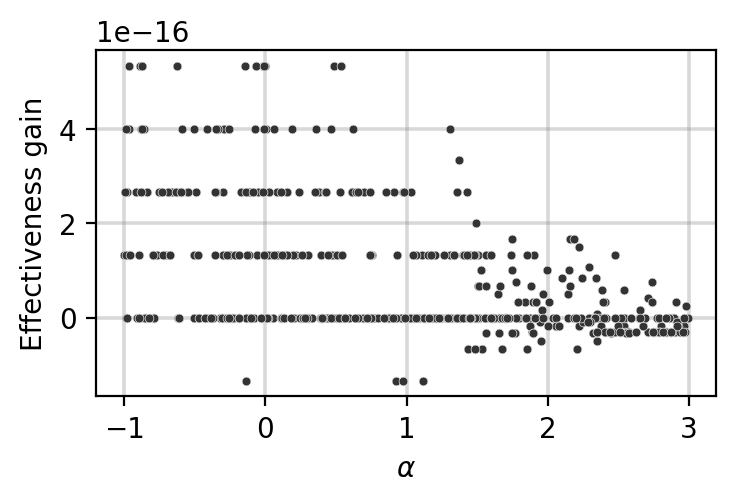

In [26]:
plt.rc('axes', axisbelow=True)

ei_gains = [i['ei_gain'] for i in out_alphas.values()]
eff_gains = [i['eff_gain'] for i in out_alphas.values()]

fig, ax = plt.subplots(1, 1, figsize=(4,2.25), dpi=200)

ax.scatter(alphas, eff_gains, marker='o', s=10, c='.2', lw=0.25, edgecolors='.9')

ax.set_ylabel('Effectiveness gain')
ax.set_xlabel(r'$\alpha$')
ax.grid(linestyle='-', linewidth=1.3, color='.5', alpha=0.3)

plt.show()

Construct network by stochastic block models and test causal emergency.